In [1]:
# personally made imports
import env
import wrangle_zillow1

# typical imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

df = wrangle_zillow1.get_zillow_data()
---OR---
df = wrangle_zillow1.new_zillow_data()
df, train, validate, test = wrangle_zillow1.prep_zillow(df, .66, .75)


In [2]:
df = wrangle_zillow1.get_zillow_data()

In [3]:
df.head()

,parcelid,logerror,transactiondate,bath,bed,sqft,fips,latitude,longitude,lot_sqft,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,zip,yearbuilt,censustractandblock
0,14297519,0.025595,2017-01-01,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,122,6.059063e+07,53571.0,1286.0,96978.0,1998.0,6.059063e+13
1,17052889,0.055619,2017-01-01,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1110,6.111001e+07,13091.0,2061.0,97099.0,1967.0,6.111001e+13
2,14186244,0.005383,2017-01-01,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,122,6.059022e+07,21412.0,1286.0,97078.0,1962.0,6.059022e+13
3,12177905,-0.103410,2017-01-01,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,0101,6.037300e+07,396551.0,3101.0,96330.0,1970.0,6.037300e+13
4,12095076,-0.001011,2017-01-01,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,0101,6.037461e+07,47019.0,3101.0,96293.0,1950.0,6.037461e+13


In [4]:
df.shape

(51884, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51884 entries, 0 to 52440
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   parcelid                   51884 non-null  int64  
 1   logerror                   51884 non-null  float64
 2   transactiondate            51884 non-null  object 
 3   bath                       51884 non-null  float64
 4   bed                        51884 non-null  float64
 5   sqft                       51884 non-null  float64
 6   fips                       51884 non-null  float64
 7   latitude                   51884 non-null  float64
 8   longitude                  51884 non-null  float64
 9   lot_sqft                   51884 non-null  float64
 10  propertycountylandusecode  51884 non-null  object 
 11  rawcensustractandblock     51884 non-null  float64
 12  regionidcity               51884 non-null  float64
 13  regionidcounty             51884 non-null  flo

# Note:
l = df[['sqft', 'finishedsquarefeet12']] \
l['difference'] = l.sqft - l.finishedsquarefeet12 \
l.difference.value_counts()

was run in the prepare phase. It should've been run here. prepare file has already been updated accordingly.

Learned:
    Columns are almost identical, few differences. I don't know which column is most accurate. sqft column had the least nulls that I had to make up for so I will choose that one and drop the finishedsquarefeet12.

# Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

    Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

    Answer those questions through a mix of statistical tests and visualizations.


log(actual price the home was sold)-log(predicted)

log(actual/predicted)

# 1 
How is does logerror change by location? ie. county? city? zip? censusdata? fips?

<AxesSubplot:xlabel='fips', ylabel='logerror'>

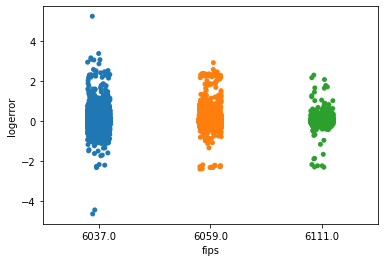

In [20]:
sns.stripplot(df.fips, df.logerror)

<AxesSubplot:xlabel='regionidcity', ylabel='logerror'>

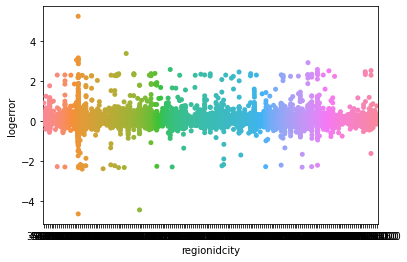

In [21]:
sns.stripplot(df.regionidcity, df.logerror)

<AxesSubplot:xlabel='regionidcounty', ylabel='logerror'>

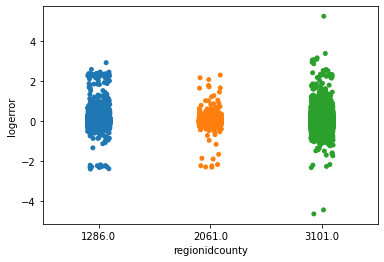

In [22]:
sns.stripplot(df.regionidcounty, df.logerror)

<AxesSubplot:xlabel='zip', ylabel='logerror'>

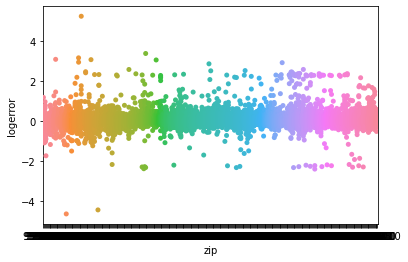

In [31]:
sns.stripplot(df.zip, df.logerror)


<AxesSubplot:xlabel='rawcensustractandblock', ylabel='logerror'>

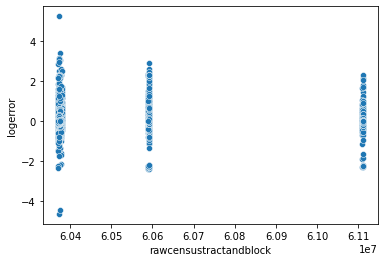

In [42]:
sns.scatterplot(df.rawcensustractandblock, df.logerror)

<AxesSubplot:xlabel='censustractandblock', ylabel='logerror'>

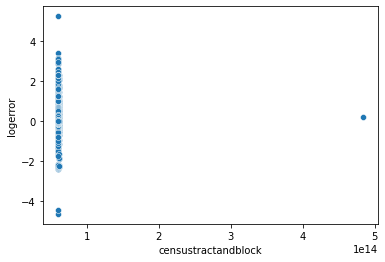

In [27]:
sns.scatterplot(df.censustractandblock, df.logerror)

In [ ]:
# analyze

In [32]:
df.censustractandblock.sort_values()

20824    6.037101e+13
51442    6.037101e+13
18392    6.037101e+13
42243    6.037101e+13
28514    6.037101e+13
             ...     
41920    6.111009e+13
24123    6.111009e+13
48649    6.111009e+13
42675    6.111009e+13
51323    4.830301e+14
Name: censustractandblock, Length: 51884, dtype: float64

In [36]:
df[df.censustractandblock > 1e14]

,parcelid,logerror,transactiondate,bath,bed,sqft,fips,latitude,longitude,lot_sqft,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,zip,yearbuilt,censustractandblock
51323,12414696,0.191992,2017-09-12,2.0,4.0,1443.0,6037.0,33864544.0,-118048405.0,5001.0,0100,6.037555e+07,10774.0,3101.0,96206.0,1972.0,4.830301e+14


In [ ]:
# based on how census blocks are derived, I think it highly unlikely that the census block above is accurate. 
# also notice above, it is not in the rawcensustractandblock
# i am dropping it.




In [38]:
df = df[df.censustractandblock < 1e14]

<AxesSubplot:xlabel='censustractandblock', ylabel='logerror'>

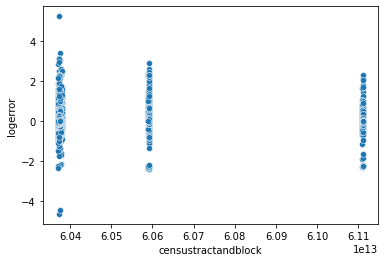

In [43]:
sns.scatterplot(df.censustractandblock, df.logerror)

# 2
How does logerror change with transaction date?

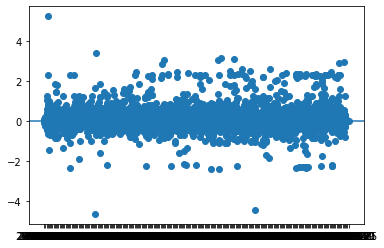

In [15]:
plt.scatter(df.transactiondate, df.logerror)

plt.axhline(y = 0)

# Takeaway

seems mostly unaffected by transaction date

# 3
How does logerror change with bed?

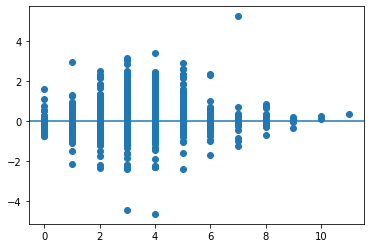

In [14]:
plt.scatter(df.bed, df.logerror)

plt.axhline(y = 0)

# Takeaway 

- seems fairly consistent regardelss of bedrooms
- most error in the 2-6 bathroom range, but that's also where the bulk of the data is  


# 4
How does logerror change with bath?

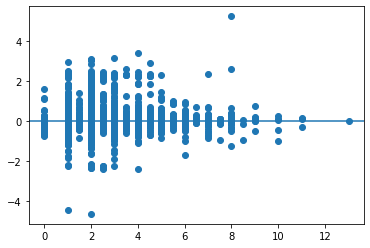

In [11]:
plt.scatter(df.bath, df.logerror)

plt.axhline(y = 0)

# Takeaway 

- possibly a slight negative correlaion. need to do stats test to be sure.


# 5
How does logerror change with lot size?

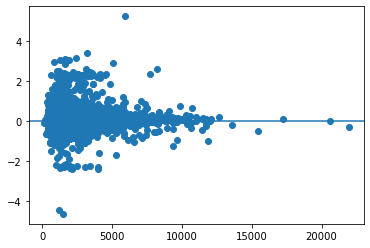

In [18]:
plt.scatter(df.sqft, df.logerror)

plt.axhline(y = 0)   

# Takeaway 

- two different trends
- verticle in the beginning
- horizontal towards the end

There appears to be a break in pattern around 5_000

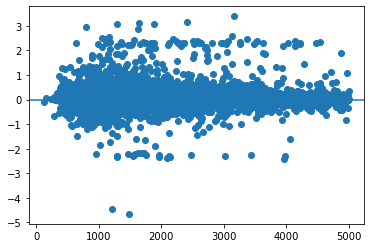

In [48]:
df_sqft_low = df[df.sqft < 5_000]

plt.scatter(df_sqft_low.sqft, df_sqft_low.logerror)

plt.axhline(y = 0)  

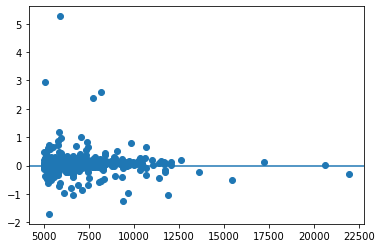

In [50]:
df_sqft_high = df[df.sqft > 5_000]

plt.scatter(df_sqft_high.sqft, df_sqft_high.logerror)

plt.axhline(y = 0) 

# Takeaway

it's still clustered around the horizontal line at zero

# Overall Takeaway

I'm currently leaning on linear regression as the best way to move forward. There are not well defined clusters in the target variable, and the target variable is continuous, so I'm leaning toward linear regression right now. (all the graphs that show clusters do so becuase the independent variable was catagorical).